In [10]:
from tqdm import tqdm
import os
import pandas as pd

DATA_DIR = "C:\\Users\\User\Desktop\\Ricardo\\phm_etching_01M01-02\\M02_Groups\\"
# DATA_DIR = "C:\\Users\\User\Desktop\\Ricardo\\phm_etching_01M01-02\\M01_Groups\\"

os.chdir(DATA_DIR)

data_export = pd.DataFrame({
    "Lot-runnum":[],
    "Length":[]
})


for fileIndex, fileElement in enumerate(tqdm(os.listdir())):
    data = pd.read_csv(fileElement)
    data_temp = pd.DataFrame({
    "Lot-runnum": [data.loc[0, "Lot-runnum"]],
    "Length": [len(data)]
})
    data_export = data_export.append(data_temp, ignore_index=True)
    
    
data_export.to_csv("../M02_dataLength.csv", index=None)
# data_export.to_csv("../M01_dataLength.csv", index=None)

100%|██████████| 5013/5013 [00:45<00:00, 109.57it/s]


In [30]:
import os
import numpy as np
import pandas as pd

DIR_PATH = "C:\\Users\\User\\Desktop\\Ricardo\\phm_etching_01M01-02\\M02_Groups_same_length\\fault\\"

os.chdir(DIR_PATH)

for fileIndex, fileElement in enumerate(os.listdir()):
    if fileIndex == 0:
        data_main = pd.read_csv(fileElement)
    else:
        data_temp = pd.read_csv(fileElement)
        data_main = data_main.append(data_temp)

data_main["recipe"] = data_main["recipe"].apply(lambda x: np.around(x, decimals=4))
data_group = data_main.groupby(by=["recipe"]).size().sort_values(ascending=False)

print(data_group)

recipe
67.0    19095
66.0     2010
69.0     2010
68.0     1005
71.0     1005
dtype: int64


In [81]:
# script to check recipe count of each fault

from collections import Counter
from tqdm import tqdm
import codecs
import numpy as np
import os
import pandas as pd

DIR_PATH = "C:\\Users\\User\\Desktop\\Ricardo\\phm_etching_01M01-02\\M02_Groups\\"
FATULT_DATA = "C:\\Users\\User\\Desktop\\Ricardo\\phm_etching_01M01-02\\01_M02_train_fault_data.csv"

os.chdir(DIR_PATH)

for fileIndex, fileElement in enumerate(tqdm(os.listdir())):
    if fileIndex == 0:
        data_main = pd.read_csv(fileElement).loc[:, ["time", "recipe"]]
    else:
        data_temp = pd.read_csv(fileElement).loc[:, ["time", "recipe"]]
        data_main = data_main.append(data_temp)

faultTime_FlowcoolPressureTooHighCheckFlowcoolPump = []
faultTime_FlowCoolPressureDroppedBelowLimit = []
faultTime_FlowcoolLeak = []
fault_FlowcoolPressureTooHighCheckFlowcoolPump = []
fault_FlowCoolPressureDroppedBelowLimit = []
fault_FlowcoolLeak = []
        
file = codecs.open(FATULT_DATA, mode="r", encoding="utf8")
for lineIndex, line in enumerate(file.readlines()):
    line_split_list = line.split(",")
    
    if line.split(",")[1] == "FlowCool Pressure Dropped Below Limit":
        faultTime_FlowCoolPressureDroppedBelowLimit.append(int(line.split(",")[0]))
    elif line.split(",")[1] == "Flowcool leak":
        faultTime_FlowcoolLeak.append(int(line.split(",")[0]))
    elif line.split(",")[1] == "Flowcool Pressure Too High Check Flowcool Pump":
        faultTime_FlowcoolPressureTooHighCheckFlowcoolPump.append(int(line.split(",")[0]))

recipe_FlowcoolPressureTooHighCheckFlowcoolPump = []
recipe_FlowCoolPressureDroppedBelowLimit = []
recipe_FlowcoolLeak = []

data_main["time"] = data_main["time"].apply(lambda x: int(np.around(x, decimals=0)))

for timeIndex, timeElement in enumerate(tqdm(faultTime_FlowcoolPressureTooHighCheckFlowcoolPump +\
                                       faultTime_FlowCoolPressureDroppedBelowLimit +\
                                       faultTime_FlowcoolLeak)):
    
    try:
        recipe = int(data_main[data_main["time"] == timeElement]["recipe"])
    except:
        continue
    
    if timeElement in faultTime_FlowcoolPressureTooHighCheckFlowcoolPump:
        recipe_FlowcoolPressureTooHighCheckFlowcoolPump.append(recipe)
    elif timeElement in faultTime_FlowCoolPressureDroppedBelowLimit:
        recipe_FlowCoolPressureDroppedBelowLimit.append(recipe)
    elif timeElement in faultTime_FlowcoolLeak:
        recipe_FlowcoolLeak.append(recipe)
        
# print(recipe_FlowcoolPressureTooHighCheckFlowcoolPump)
# print(recipe_FlowCoolPressureDroppedBelowLimit)
# print(recipe_FlowcoolLeak)
print(Counter(recipe_FlowcoolPressureTooHighCheckFlowcoolPump))
print(Counter(recipe_FlowCoolPressureDroppedBelowLimit))
print(Counter(recipe_FlowcoolLeak))

100%|██████████| 5013/5013 [01:33<00:00, 53.84it/s] 


Counter({67: 2, 66: 1})
Counter({67: 20, 69: 2, 68: 1})
Counter({67: 8, 66: 1, 71: 1})


In [87]:
# print of each reipe of FlowCoolPressureDroppedBelowLimit file
from tqdm import tqdm
import os
import numpy as np
import pandas as pd

DIR_PATH = "C:\\Users\\User\\Desktop\\Ricardo\\phm_etching_01M01-02\\M02_Groups_same_length\\fault\\"

os.chdir(DIR_PATH)

for fileIndex, fileElement in enumerate(os.listdir()):
    data_temp = pd.read_csv(fileElement)
    data_temp["recipe"] = data_temp["recipe"].apply(lambda x: int(x))
    print(fileElement, set(data_temp["recipe"].tolist()))

TotalFault_1_Flowcoolleak_Lot_runnum_9174-11470110.csv {66, 67}
TotalFault_1_Flowcoolleak_Lot_runnum_9181-12630756.csv {70, 71}
TotalFault_1_Flowcoolleak_Lot_runnum_9206-10888413.csv {67}
TotalFault_1_Flowcoolleak_Lot_runnum_9240-11891186.csv {65, 66}
TotalFault_1_Flowcoolleak_Lot_runnum_9690-12588681.csv {67}
TotalFault_1_Flowcoolleak_Lot_runnum_9741-12620338.csv {66, 67}
TotalFault_1_FlowCoolPressureDroppedBelowLimit_Lot_runnum_3605-11472802.csv {67, 68}
TotalFault_1_FlowCoolPressureDroppedBelowLimit_Lot_runnum_486-12643526.csv {68, 69}
TotalFault_1_FlowCoolPressureDroppedBelowLimit_Lot_runnum_9238-11934763.csv {66, 67}
TotalFault_1_FlowCoolPressureDroppedBelowLimit_Lot_runnum_9241-11779495.csv {66, 67}
TotalFault_1_FlowCoolPressureDroppedBelowLimit_Lot_runnum_9251-11790541.csv {66, 67}
TotalFault_1_FlowCoolPressureDroppedBelowLimit_Lot_runnum_9251-11856566.csv {66, 67}
TotalFault_1_FlowCoolPressureDroppedBelowLimit_Lot_runnum_9289-10810825.csv {66, 67}
TotalFault_1_FlowCoolPressureD

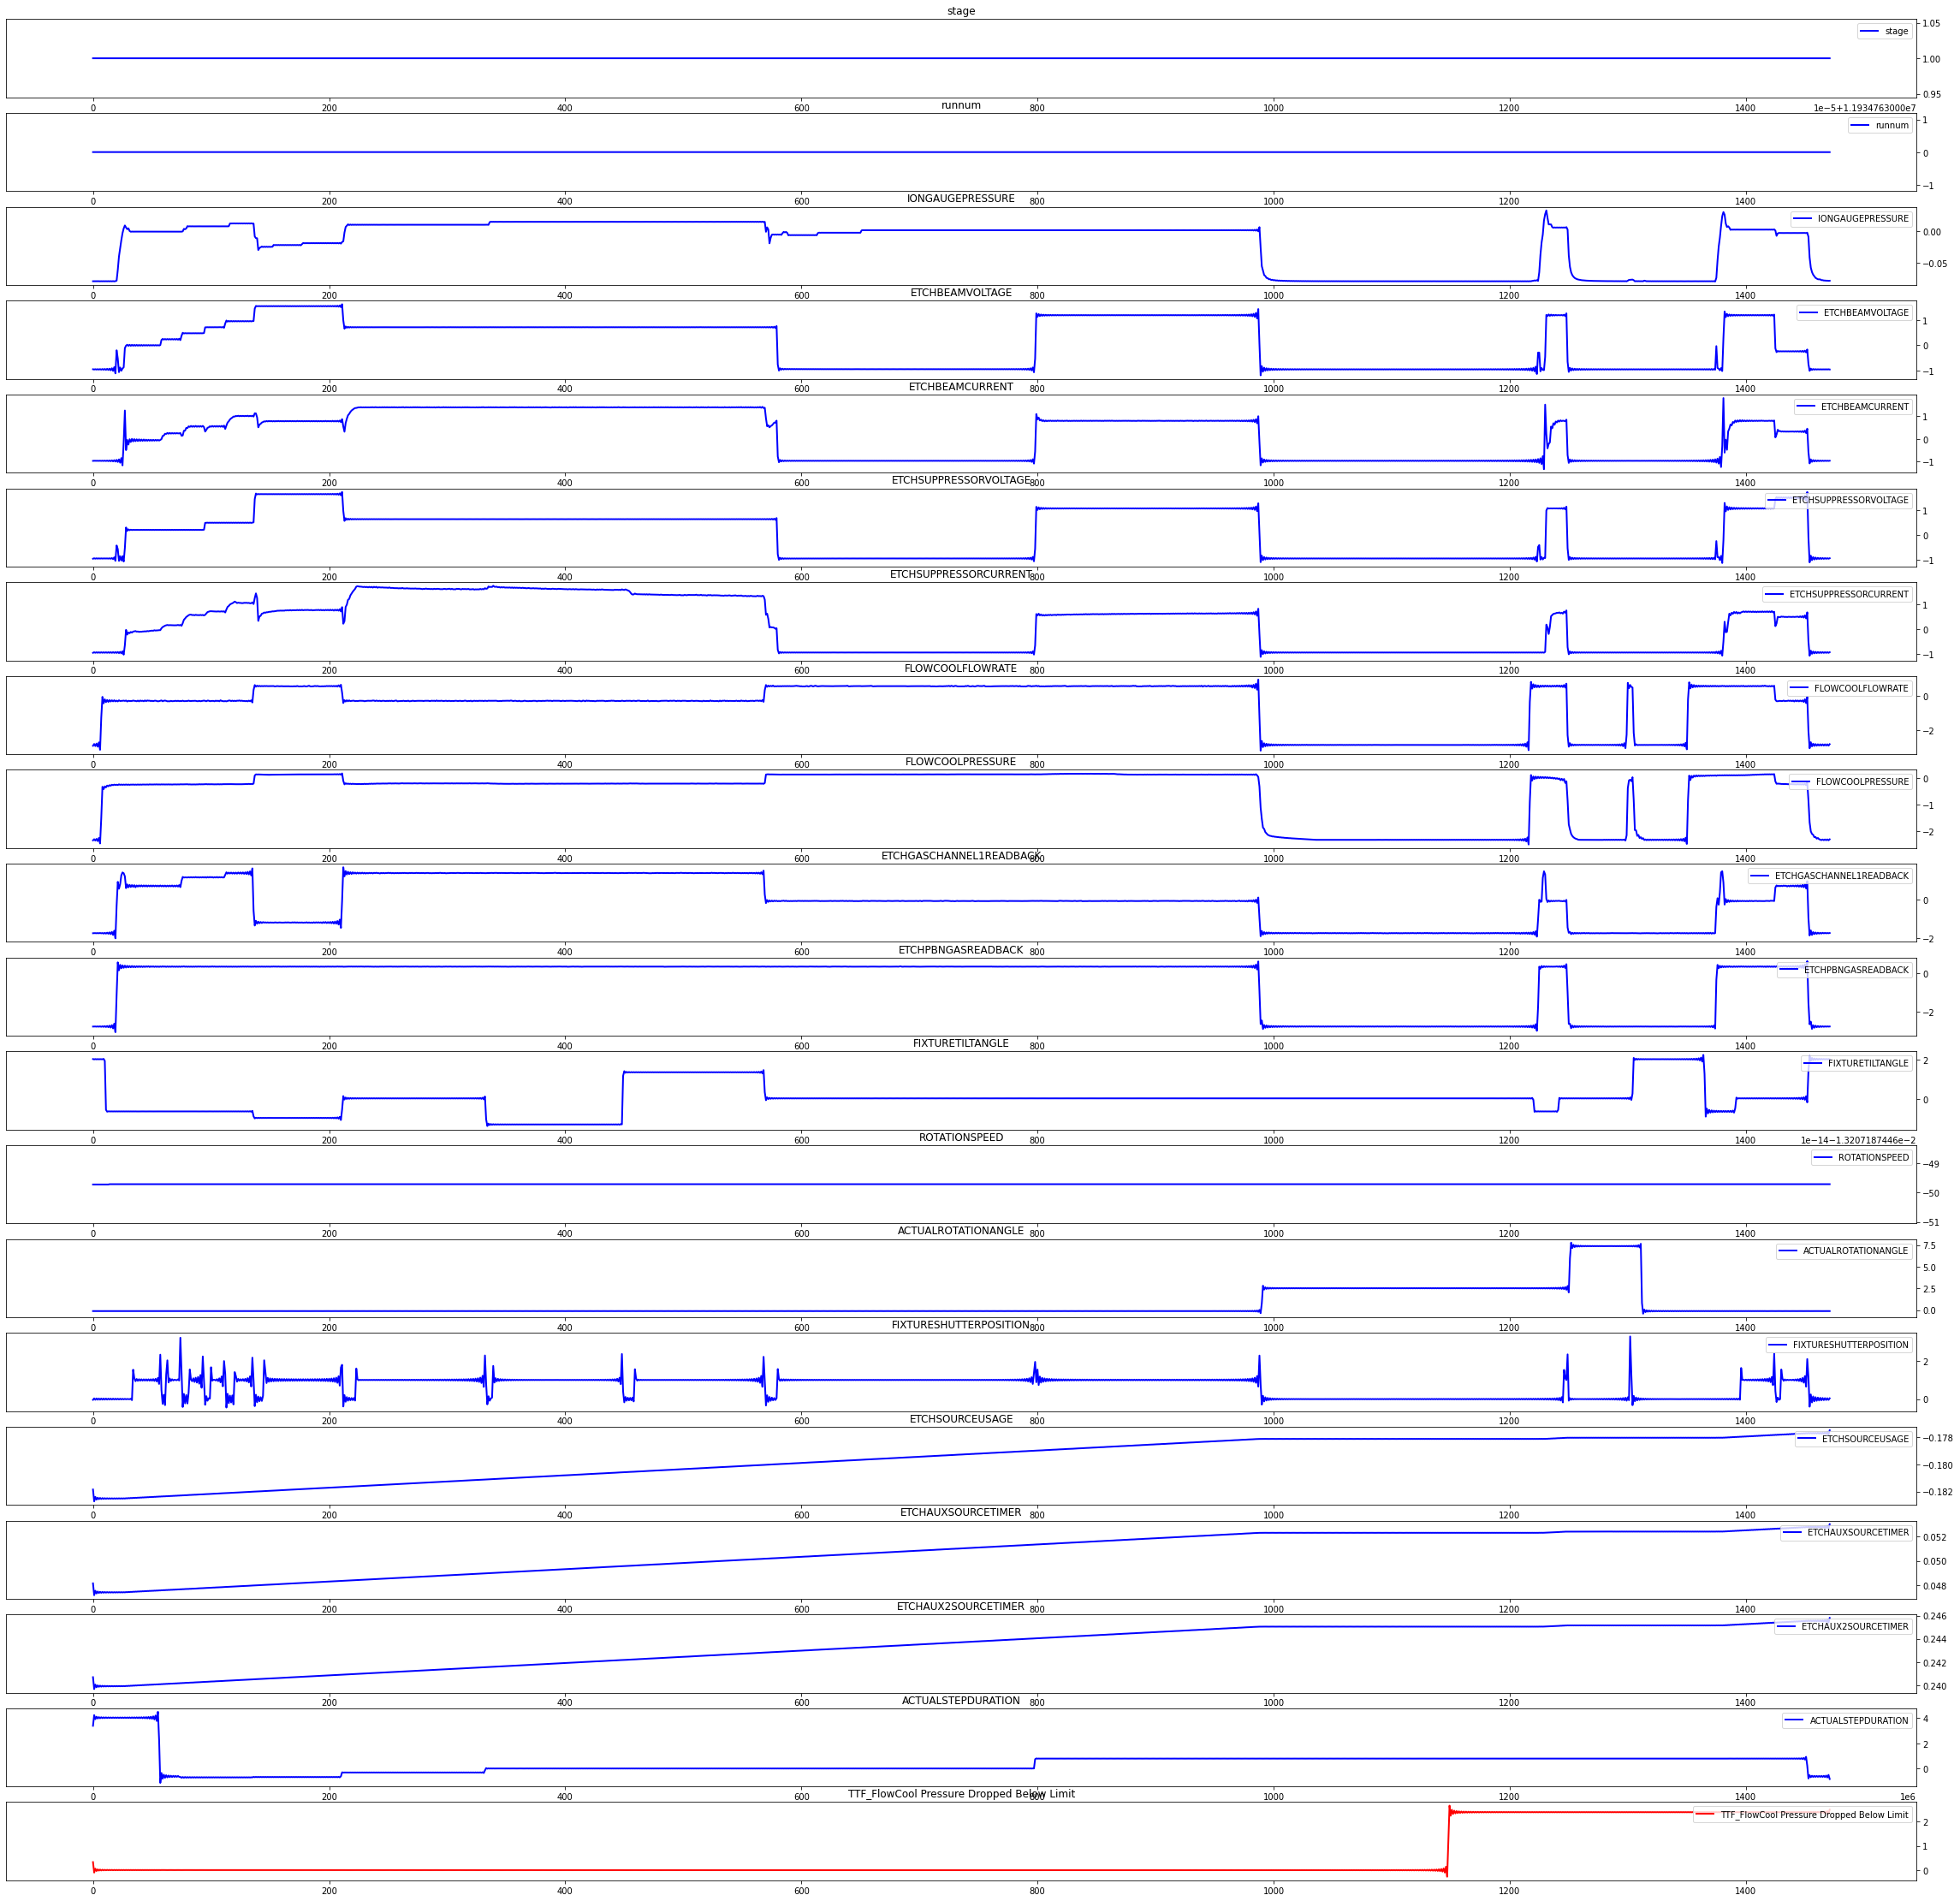

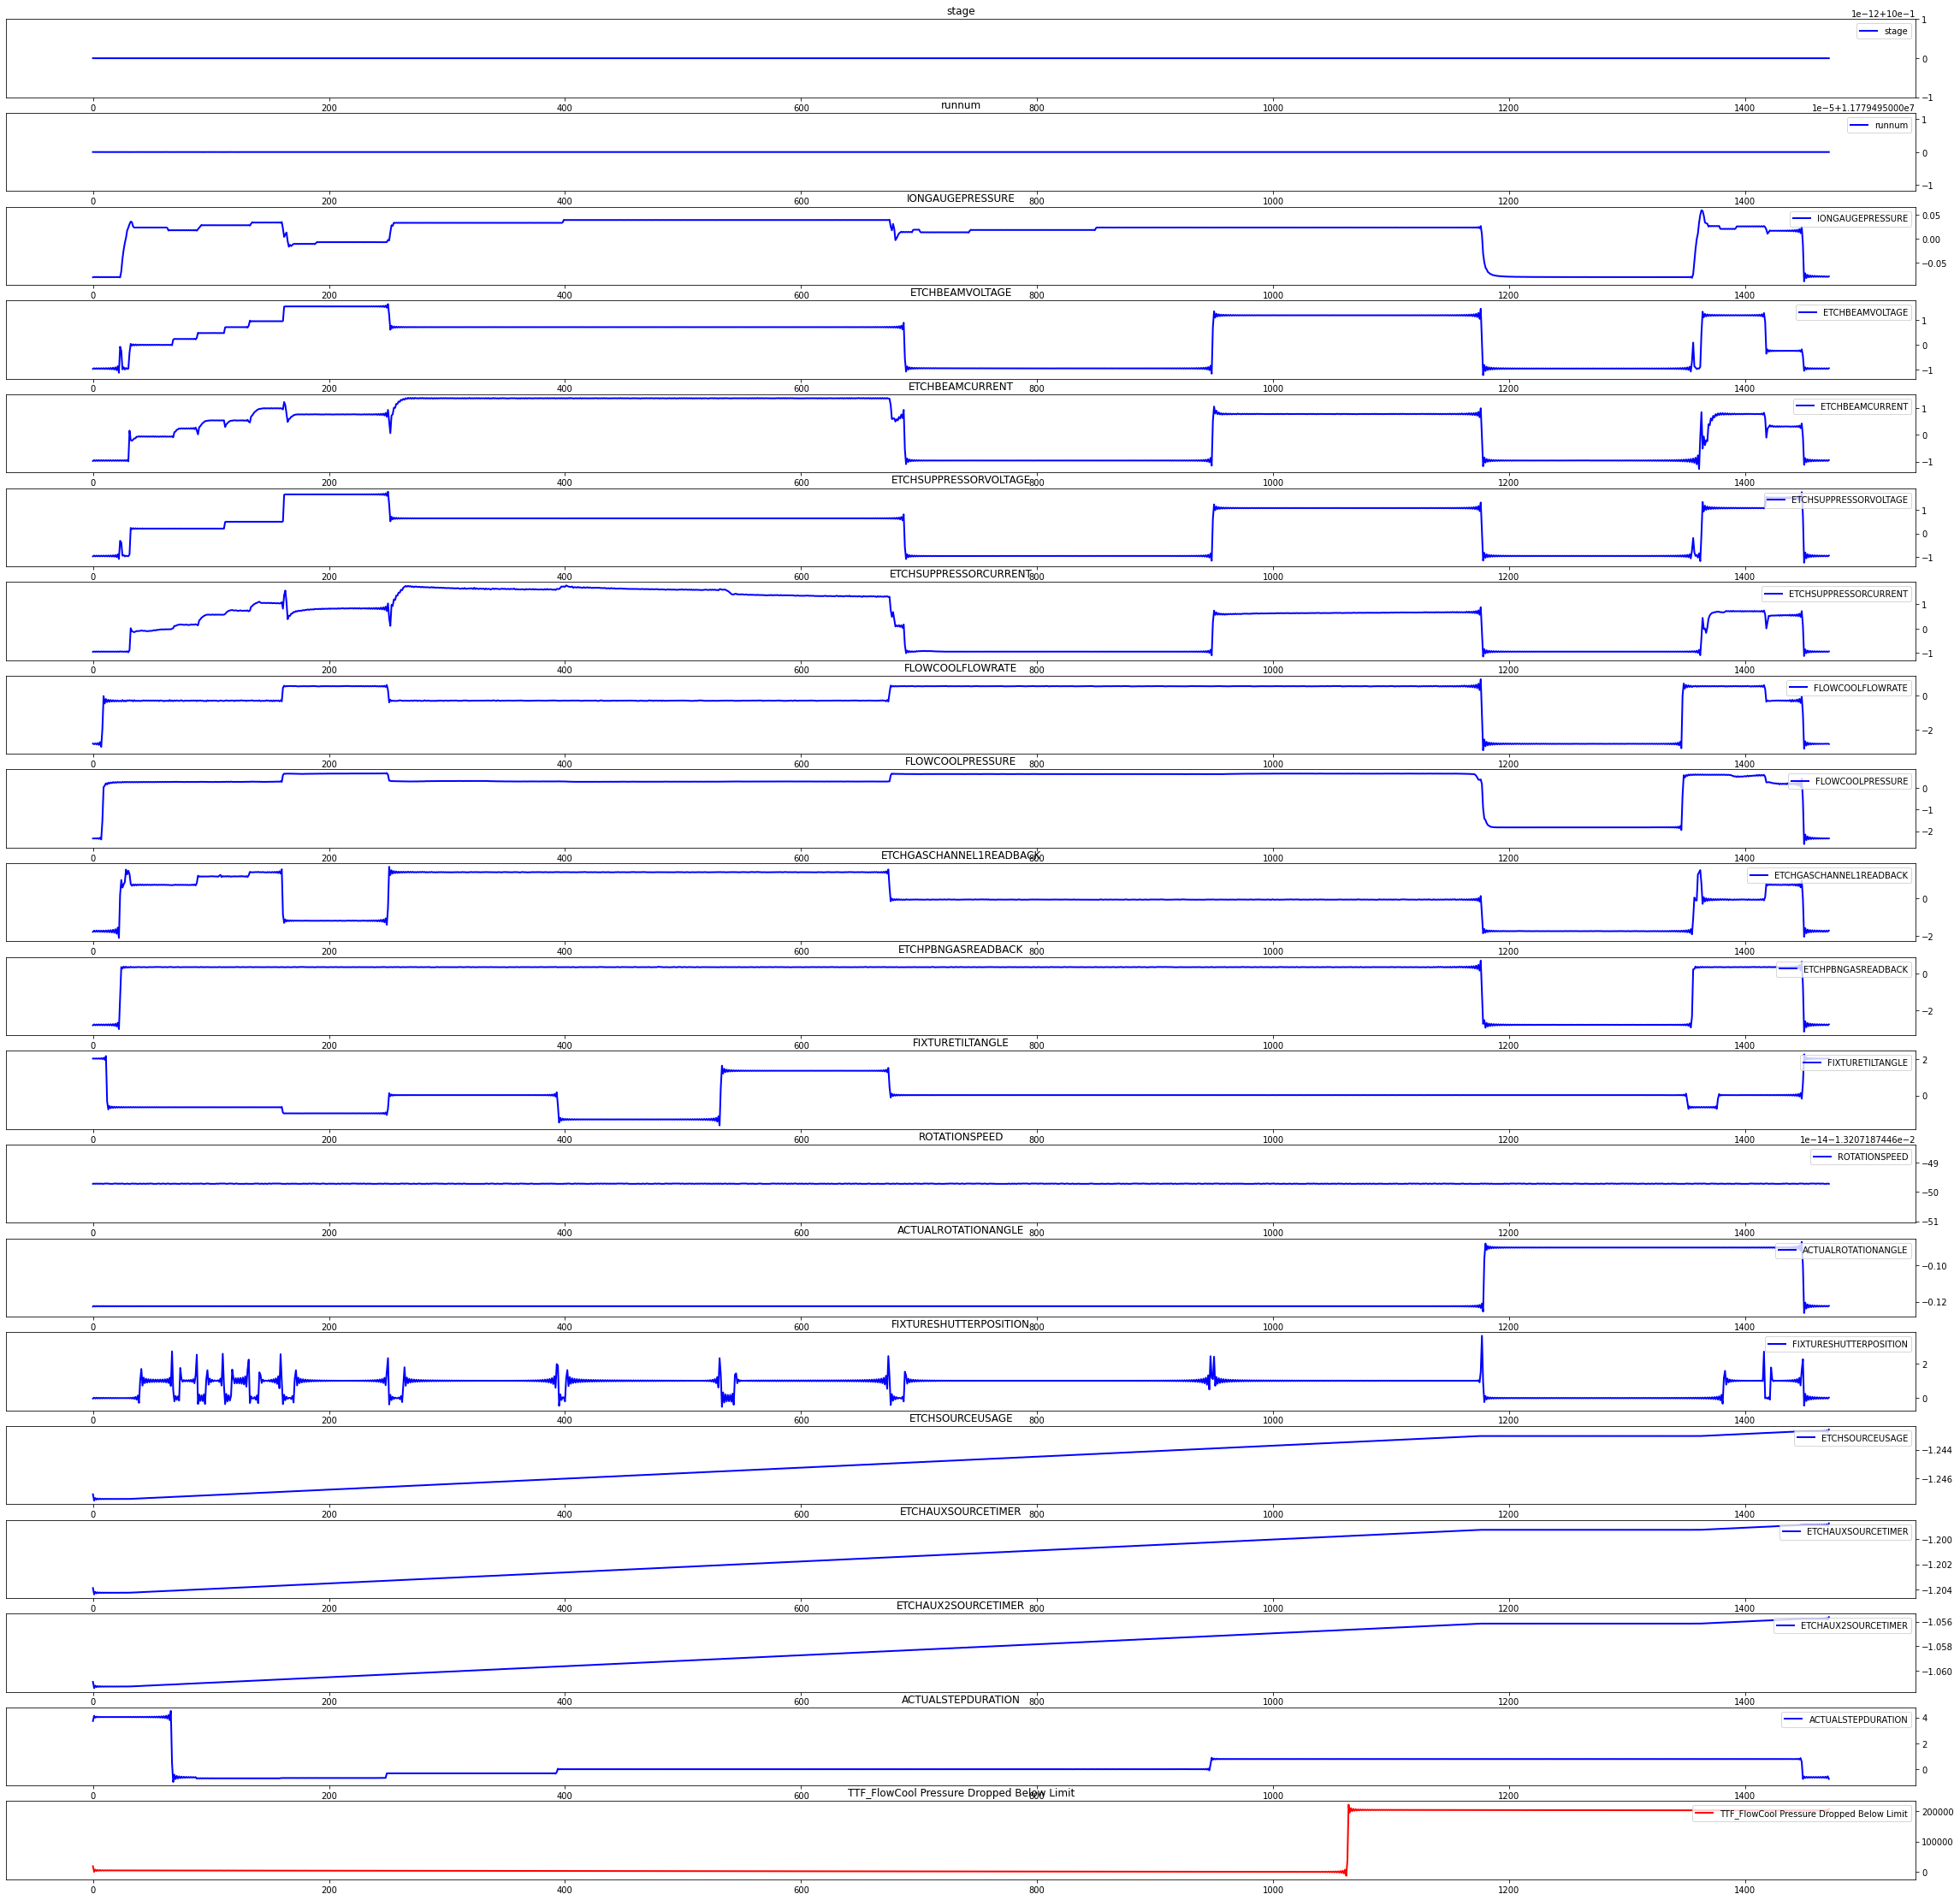

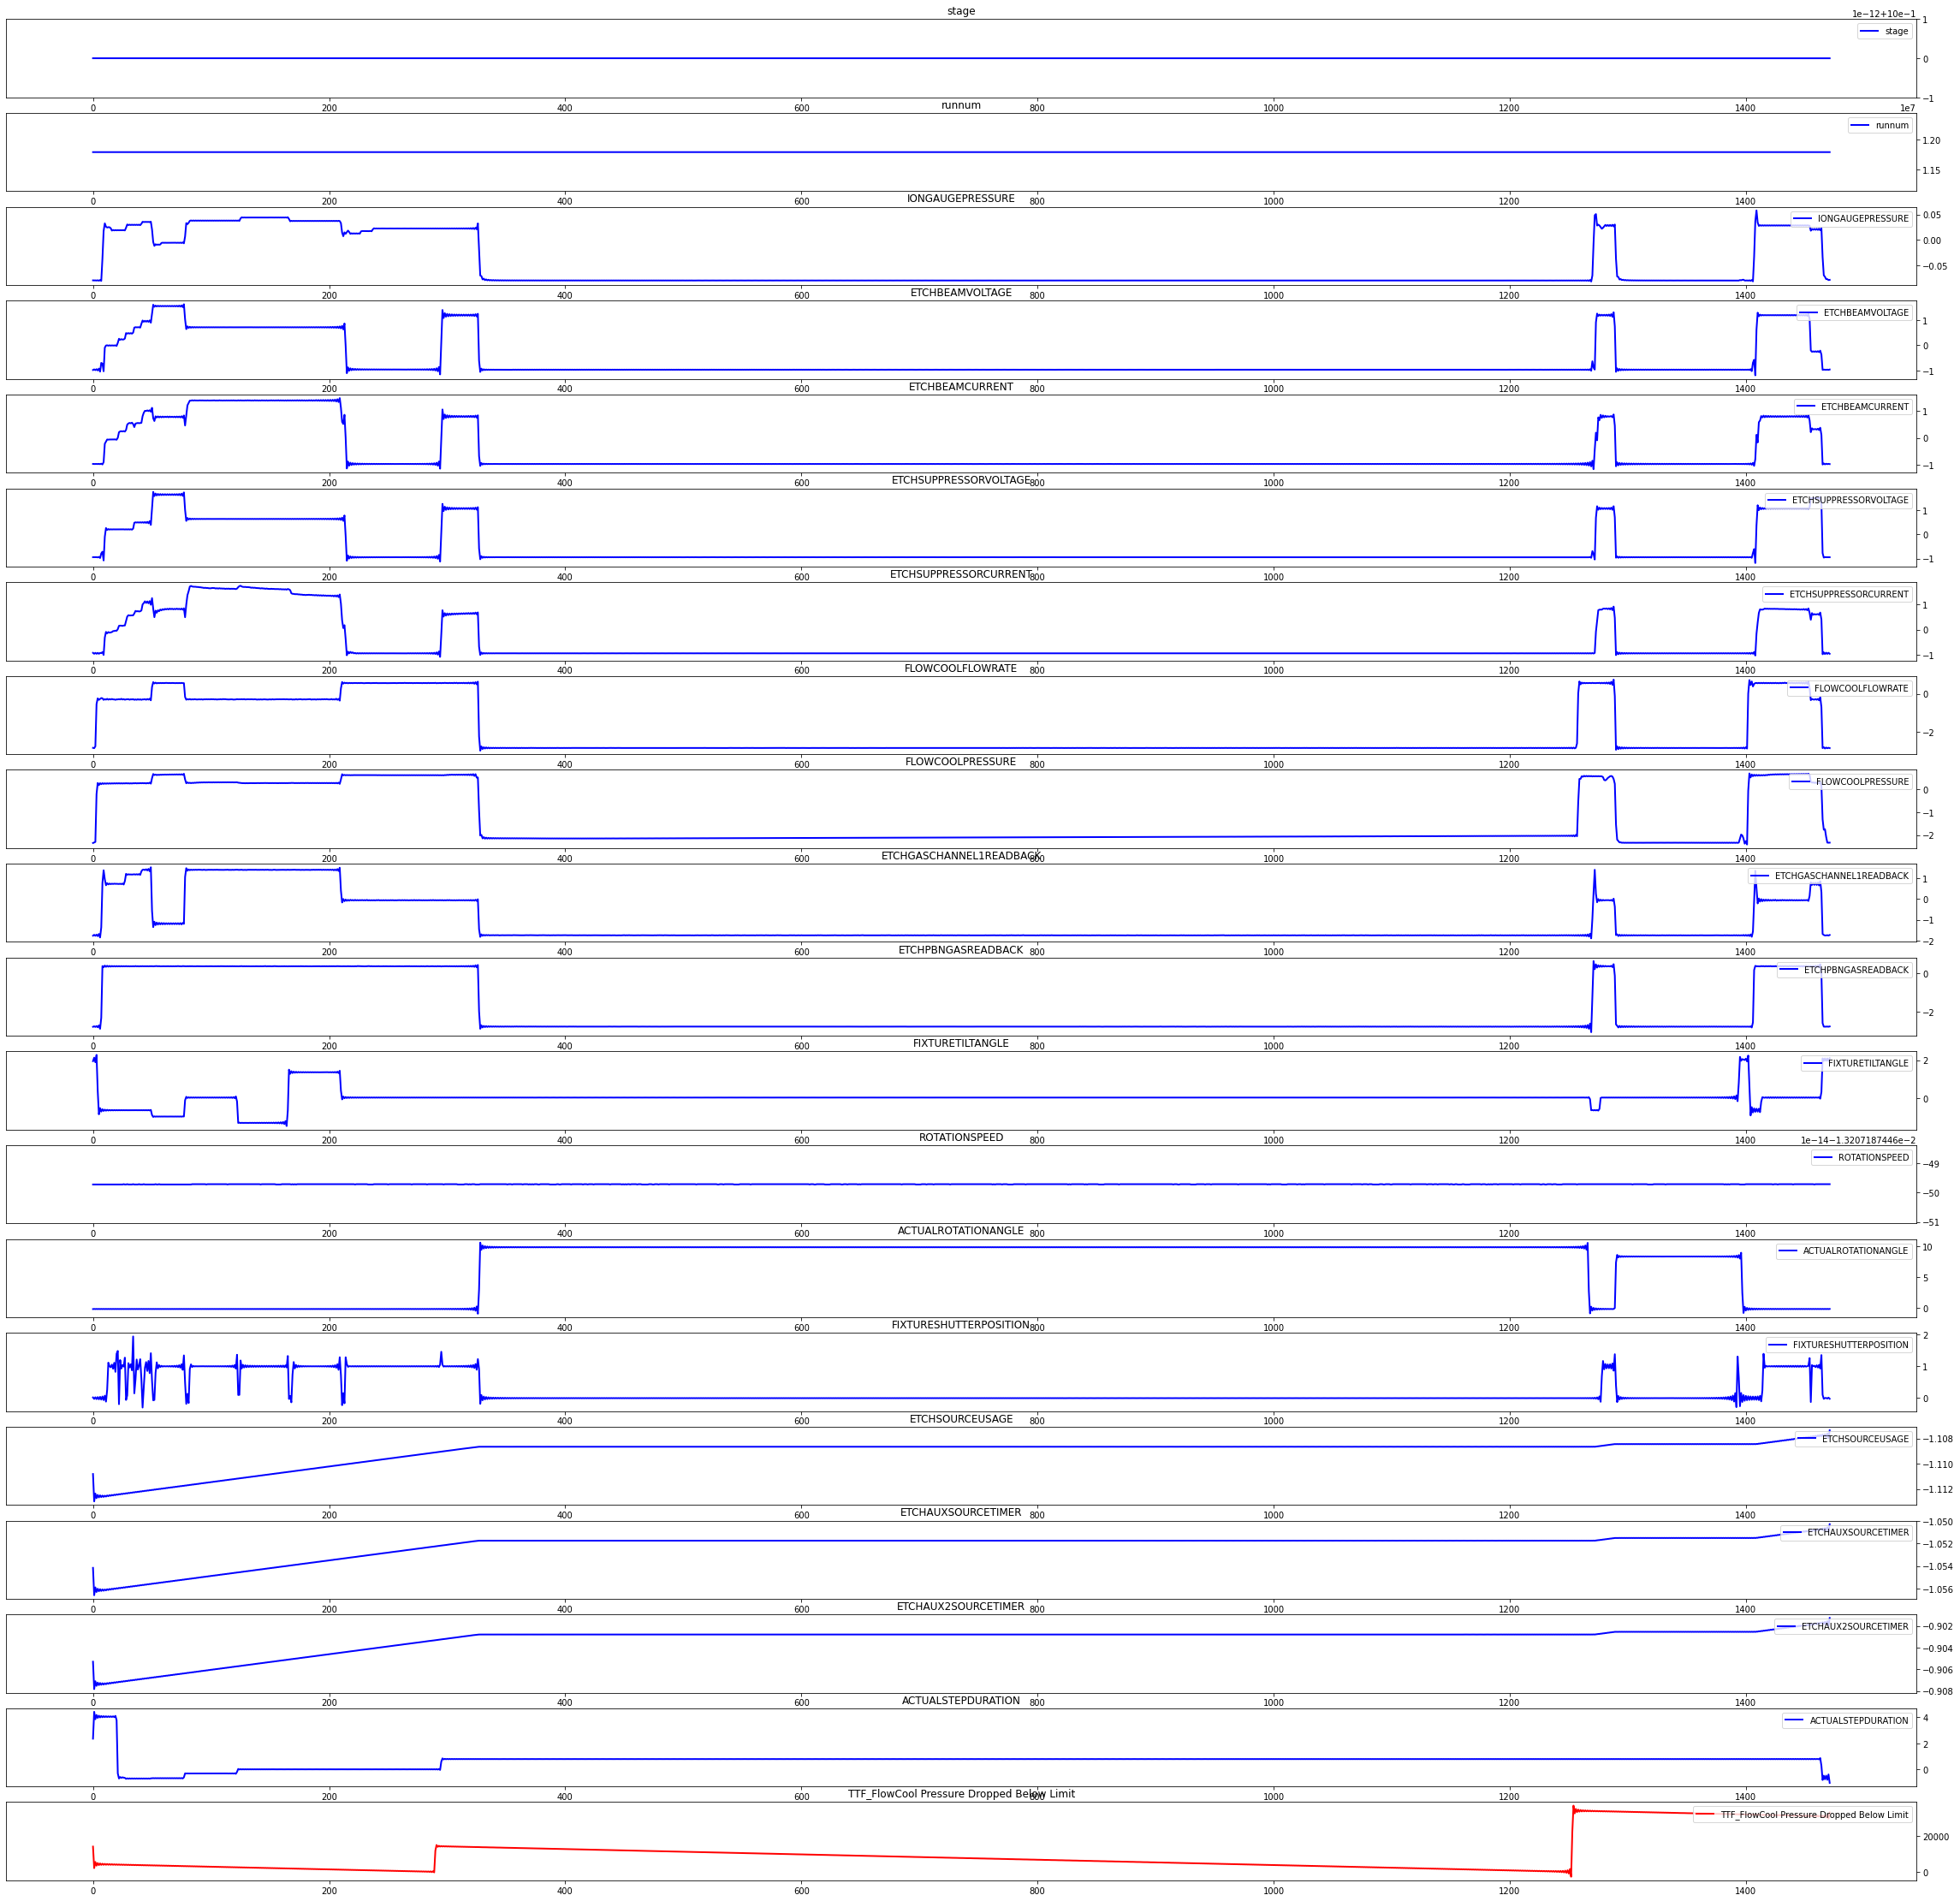

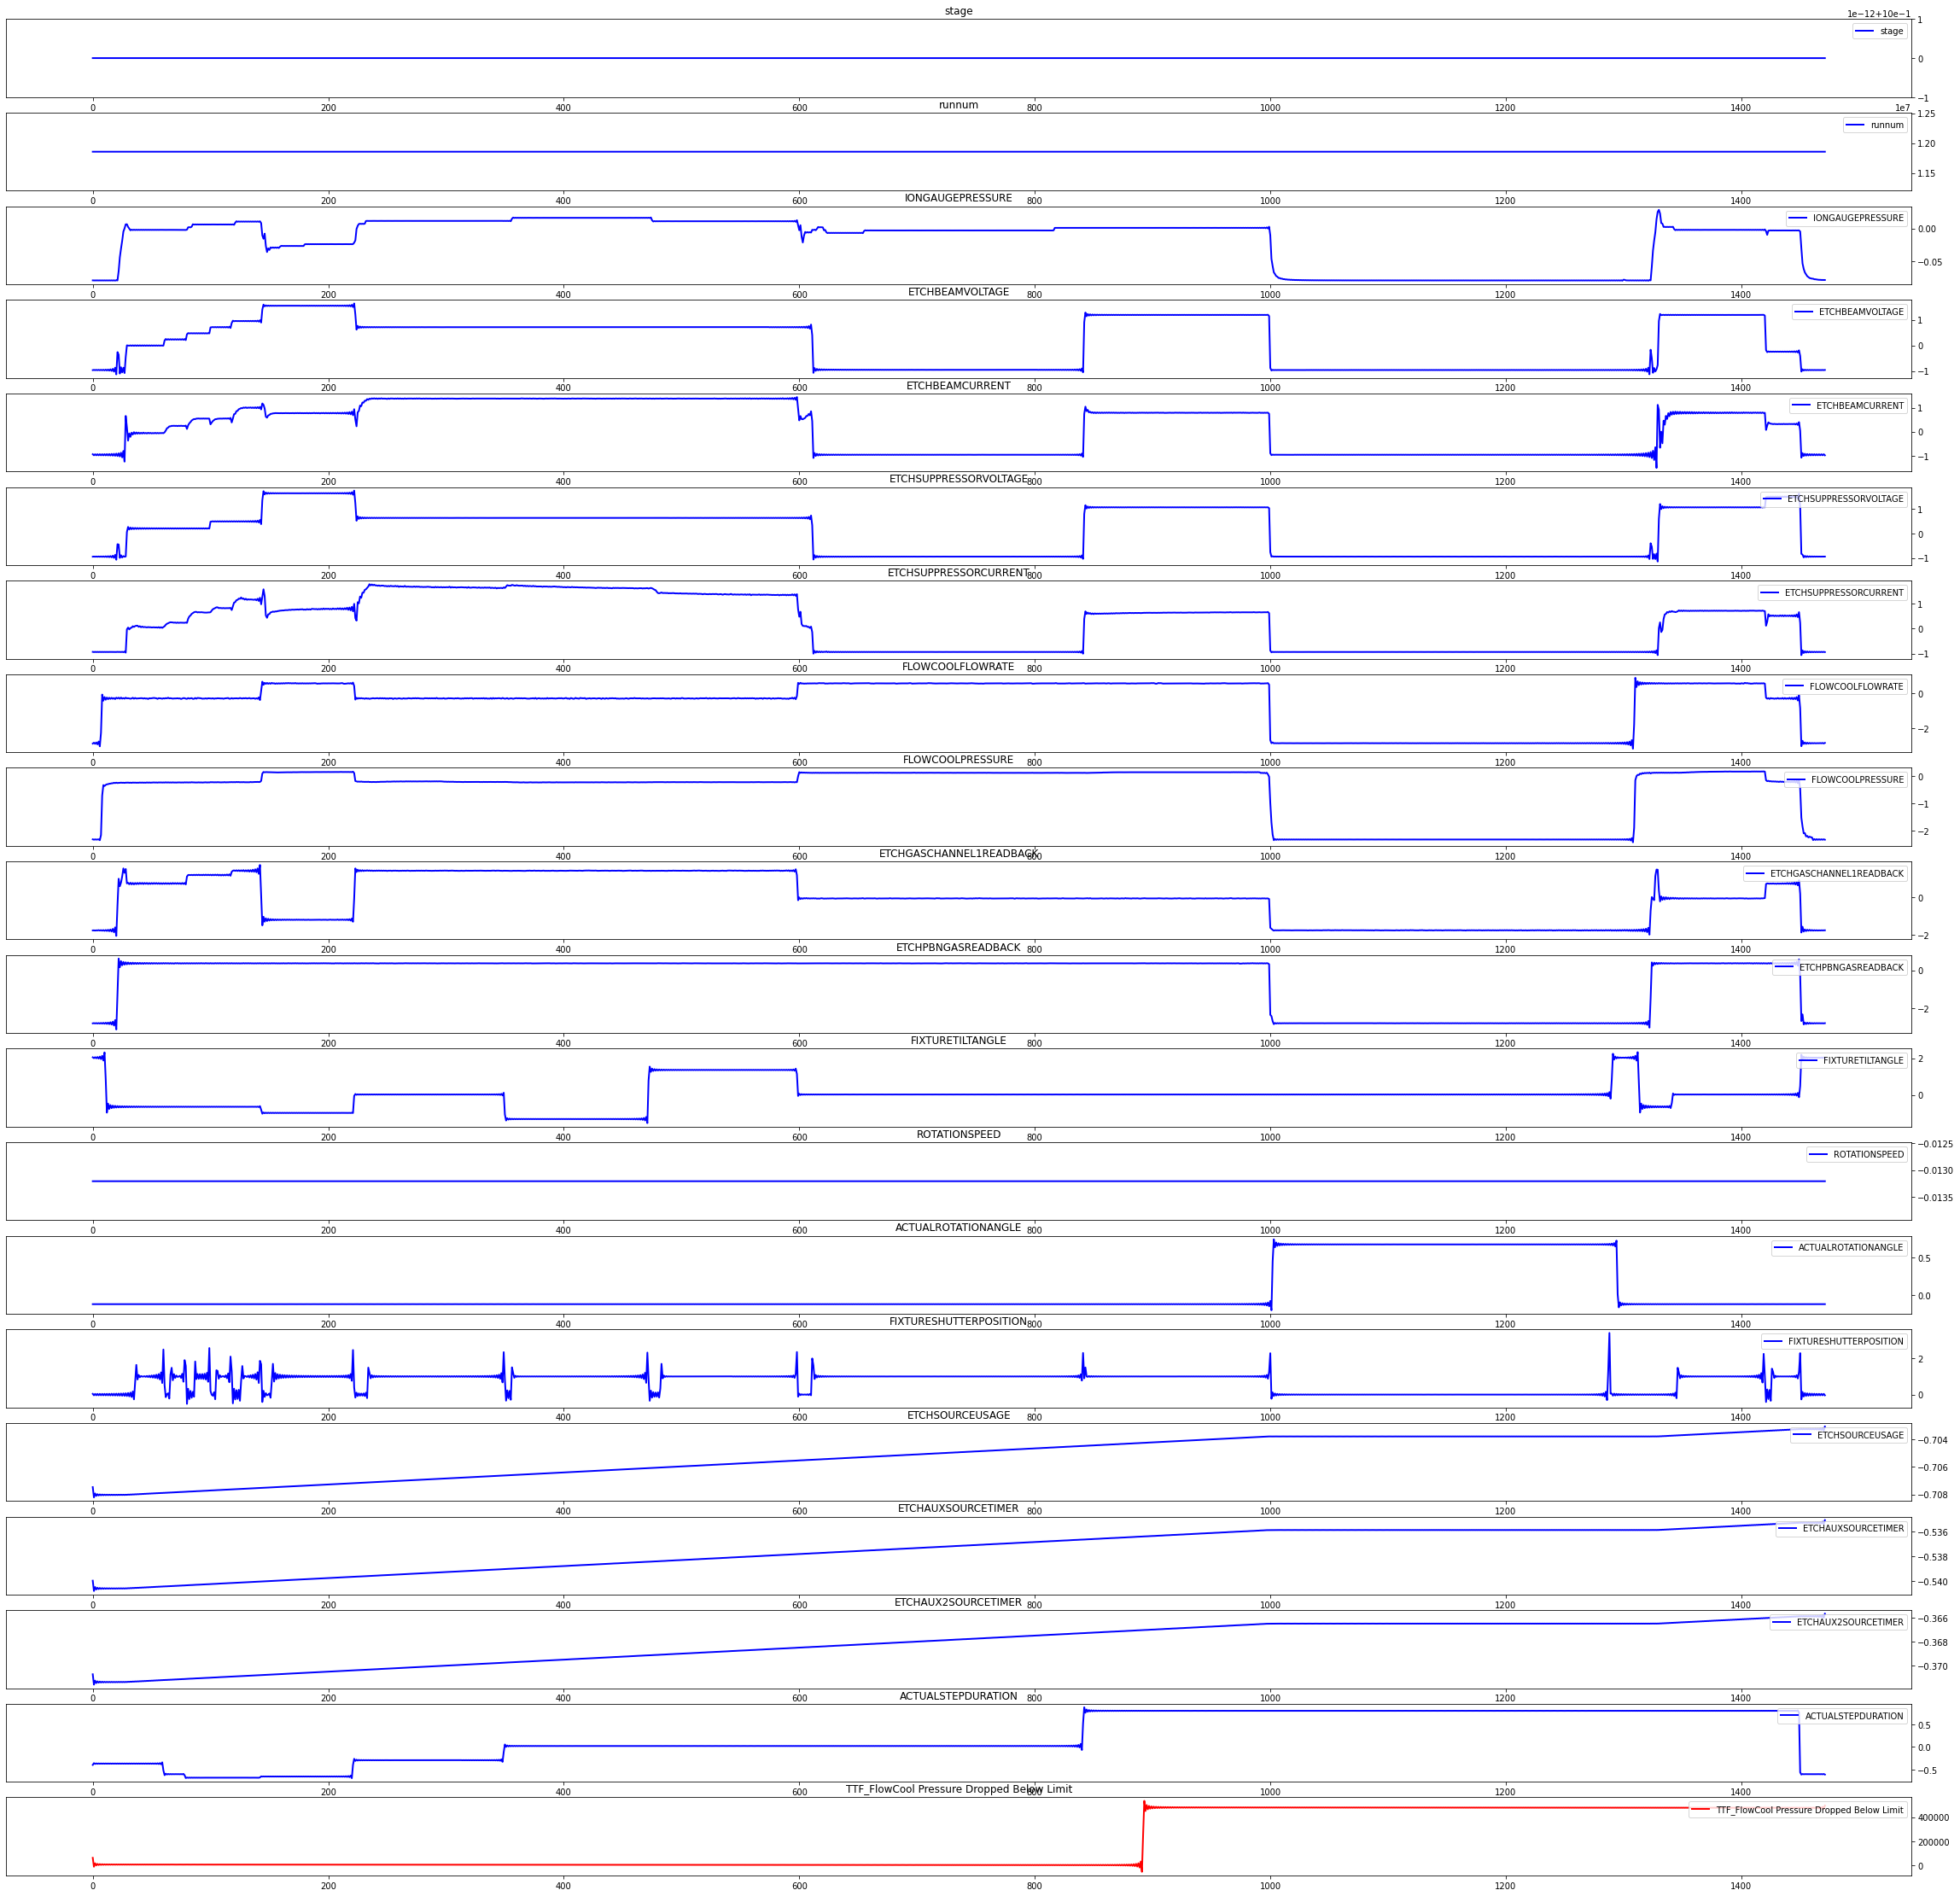

In [100]:
# plotting several fault data
import matplotlib.pyplot as plt
import os
import pandas as pd

DIR_PATH = "C:\\Users\\User\\Desktop\\Ricardo\\phm_etching_01M01-02\\M02_Groups_recipe_67_same_length\\fault\\"
PLOT_DATA_PATH = ["TotalFault_1_FlowCoolPressureDroppedBelowLimit_Lot_runnum_9238-11934763.csv",
                 "TotalFault_1_FlowCoolPressureDroppedBelowLimit_Lot_runnum_9241-11779495.csv",
                 "TotalFault_1_FlowCoolPressureDroppedBelowLimit_Lot_runnum_9251-11790541.csv",
                 "TotalFault_1_FlowCoolPressureDroppedBelowLimit_Lot_runnum_9251-11856566.csv"]

os.chdir(DIR_PATH)

for fileIndex, fileElement in enumerate(PLOT_DATA_PATH):
    neglect_column_list =  ['time', 'Tool', 'Lot',  'recipe', 'recipe_step',
       'TTF_Flowcool Pressure Too High Check Flowcool Pump',
       'TTF_Flowcool leak', "Lot-runnum"]
    data = pd.read_csv(fileElement)
    fig, axs = plt.subplots((len(data.columns) - len(neglect_column_list)), 1, figsize=(40,40))
    
    remain_list = []
    for column in data.columns:
        if column in neglect_column_list:
            continue
        else:
            remain_list.append(column)
    
    for columnIndex, column in enumerate(remain_list):
        if column == 'TTF_FlowCool Pressure Dropped Below Limit':
            color = "red"
        else:
            color = "blue"
            
        axs[columnIndex].plot(data.loc[:, column], label=column, color=color, linewidth=2)
        axs[columnIndex].set_title(column)
        axs[columnIndex].legend(loc="upper right")
        axs[columnIndex].yaxis.tick_right()
        
    plt.savefig("../../" + fileElement[:-4] + ".svg", format='svg', bbox_inches="tight")
